In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [8]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,random_state=0,test_size=0.30);

In [12]:
x_train

array([[0.19047619, 0.        ],
       [1.        , 0.64444444],
       [0.47619048, 0.71851852],
       [0.52380952, 0.68148148],
       [0.57142857, 0.28148148],
       [0.4047619 , 0.32592593],
       [0.71428571, 0.19259259],
       [0.71428571, 0.88148148],
       [0.47619048, 0.72592593],
       [0.26190476, 0.98518519],
       [0.19047619, 0.        ],
       [1.        , 0.2       ],
       [0.14285714, 0.02962963],
       [0.57142857, 0.99259259],
       [0.66666667, 0.6       ],
       [0.23809524, 0.32592593],
       [0.5       , 0.6       ],
       [0.23809524, 0.54814815],
       [0.54761905, 0.42222222],
       [0.64285714, 0.08148148],
       [0.35714286, 0.4       ],
       [0.04761905, 0.4962963 ],
       [0.30952381, 0.43703704],
       [0.57142857, 0.48148148],
       [0.4047619 , 0.42222222],
       [0.35714286, 0.99259259],
       [0.52380952, 0.41481481],
       [0.78571429, 0.97037037],
       [0.66666667, 0.47407407],
       [0.4047619 , 0.44444444],
       [0.

In [13]:
y_train

92     0
223    1
234    0
232    1
377    0
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 280, dtype: int64

In [14]:
from sklearn.linear_model import LogisticRegression

In [24]:
%pip install seaborn

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='Purchased', ylabel='count'>

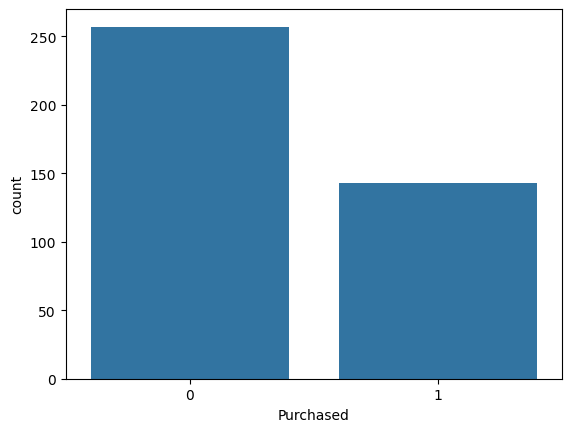

In [25]:
import seaborn as sns
sns.countplot(x=y)

In [26]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [27]:
classifier = LogisticRegression()

In [28]:
classifier.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_pred = classifier.predict(x_test)

In [30]:
y_train.shape

(280,)

In [31]:
x_train.shape

(280, 2)

In [32]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [33]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
216    0
259    1
49     0
238    0
343    1
Name: Purchased, Length: 120, dtype: int64

In [34]:
import matplotlib.pyplot as plt

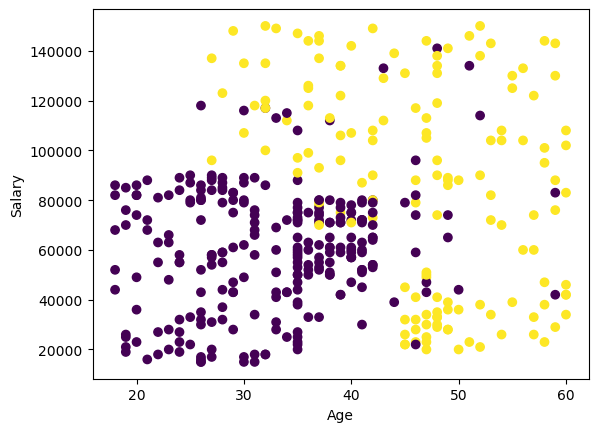

In [35]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(x['Age'],x['EstimatedSalary'],c=y)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [37]:
pd.DataFrame(x_scaled).describe()

,0,1
count,400.000000,400.000000
mean,0.467976,0.405500
std,0.249592,0.252570
min,0.000000,0.000000
25%,0.279762,0.207407
50%,0.452381,0.407407
75%,0.666667,0.540741
max,1.000000,1.000000


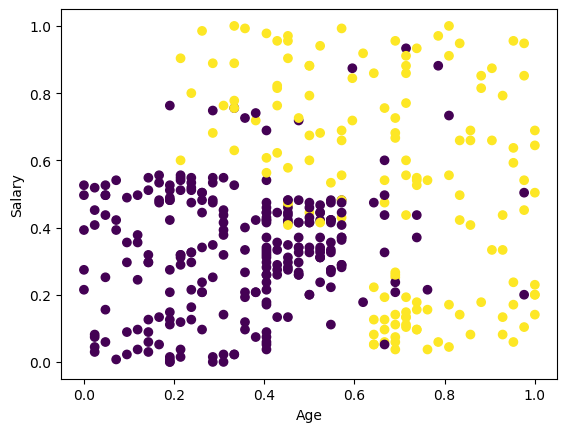

In [39]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=y)

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test,y_pred)

array([[76,  3],
       [16, 25]], dtype=int64)

In [42]:
y_test.value_counts()

Purchased
0    79
1    41
Name: count, dtype: int64

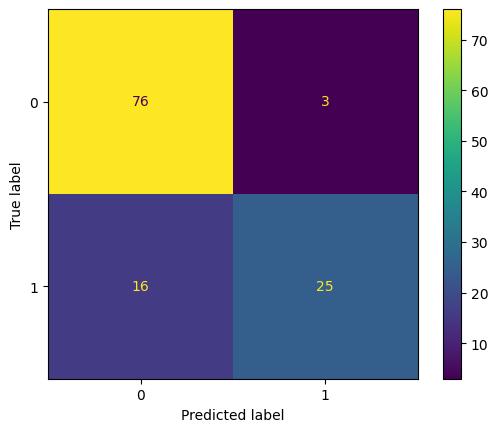

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8416666666666667

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        79
           1       0.89      0.61      0.72        41

    accuracy                           0.84       120
   macro avg       0.86      0.79      0.81       120
weighted avg       0.85      0.84      0.83       120



In [49]:
new1=[[26,34000]]
new2=[[57,138000]]


In [50]:
classifier.predict(scaler.transform(new1))

/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [51]:
classifier.predict(scaler.transform(new2))

/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)